<a href="https://colab.research.google.com/github/clopensesame/Nazzaro_DSPN_S24/blob/main/Nazzaro_DSPN_S23_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat's Out of the Bag: Feline Friends Help Us Find Love

### Background

Online dating platforms have revolutionized the way we find love and connection. Whether someone is looking for love or simply looking, most users recognize that dating platforms are, for better or worse, a numbers game. This leads users to consider questions like "How do I make my profile look more attractive or more dateable? How do I get more likes on my profile?" Users know that how they present themselves has a direct impact on who, and how many, they engage with. One common way of making a profile seem more friendly, caring, or attractive is to include a photo of the user and a pet.

In this study for Research Methods in Social Psychology under Dr. Cox-Boyd, Julia, Johnny, Lily and I surveyed the CMU community and investigated whether having photo with a cat would make a profile seem more attractive. So, do cats make people more attractive?

### Variables
We originally had 46 participants. Post-Cleaning and using only participants for whom the manipulation check was successful, we had 25 participants and 12 variables.

Our variables included the following:

**id**: participant's id number
* class: character
* observations: 1, 2,...,43
  * participants removed (21)
    * due to NAs (6): id = 37, 39, 41, 42, 44, 45
    * due to failed manipulation (15): id = 3, 5, 10, 13, 15, 16, 20, 21, 22, 23, 28, 30, 31, 36, 46

**age**: participant's age within given ranges
* class: character
* observations:
  * 18-24 (24 participants)
  * 55-64 (1 participant)

**gender**: participant's gender
* class: character
* observations:
  * Male (4 participants)
  * Female (18 participants)
  * Non-Binary/Third Gender (2 participants)
  * Prefer Not to Say (1 participants)

**orientation**: participant's sexual orientation
* class: character
* observations:
  * Heterosexual (11 participants)
  * Homosexual (4 participants)
  * Bisexual (6 participants)
  * Asexual (2 participants)
  * Prefer to Self-Describe (1 participant)
  * Prefer Not to Say (1 participant)

**race**: participant's race
* class: character
* observations:
  * Mixed Race (2 participants)
  * Asian (20 participants)
  * White (3 participants)

**catliking**: how much participant likes cats on a scale of 1-10
* class: numeric

**likes**: how many likes the participant believes the profile will receive in 24 hours relative to the average amount of likes
* class: character

**attractiveness**: how attractive the participant believes the profile is on a 1-5 scale
* class: numeric

**group**: profile group the participant was assigned to based on participant's reported gender and sexuality, which determined whether they saw a female or male profile, and random assignment to a profile with a cat or without a cat
* class: character
* observations:
  * f cat (3 participants)
  * f no cat (5 participants)
  * m cat (6 participants)
  * m no cat (11 participants)

**profile_gender**: gender of profile participant saw
* class: character
* observations:
  * f (8 participants)
  * m (17 participants)

**profile_cat**: cat or no cat condition of profile participant saw
* class: character
* observations:
  * cat (9 participants)
  * no cat (16 participants)

**manipcheck**: true or false whether participant correctly remembered seeing or not seeing a cat based on which profile they were assigned to
* class: character
* observations:
  * true (25 participants)  #used in our analysis
  * false (15 participants) #not used in our analysis

### Hypotheses

* Linear Regression
  * $attractiveness = B_0 + B_gx_g + B_cx_c$ where $B_g$ is the effect of profile gender on attractiveness and $B_c$ is the effect of having a cat in ones profile on attractiveness.
  * I would also like to add that the ANOVA result indicated no significant effect of the interaction between profile gender and cat inclusion, so I omitted it from the linear regression. We initially expected an interaction since we believed women are more stereotypically thought to be cat people than men (e.g. no male equivalent for the term "cat lady"), and according to prototypicality theory, people generally prefer individuals who have prototypical traits for their group (e.g. conform to gender norms). Furthermore, according to Kogan and Volsche (2020), men were seen as less attractive when they posed with a cat vs no cat.

* Bootstrapping
  * Next, I will see whether presence of a cat can be predicted by attractiveness and profile gender using a linear model.
  * I predict the model to have moderate accuracy, indicated by a 95% confidence interval with a lower bound at least greater than 50% (chance). I predict the permutation test to yield a small probability of observing a stronger negative effect than our real effect due to chance.

* LOOCV
  * The prediction error will be small, indicating that these results are generalizable to new data. I chose LOOCV rather than k-fold or kNN to predict the accuracy of my revised linear regression model with no interaction term ($attractiveness = B_0 + B_gx_g + B_cx_c$) due to the small sample size.

### Data Organization

I pulled relevant variables for this project and made the responses in the dataframe more closely mirror the response options in our [qualtrics survey](https://cmu.ca1.qualtrics.com/jfe/form/SV_6gumWFZB6IM5FH0). Since some values were saved as chr numbers ('1', '2', '', etc.) rather than the response options, pulling values from the original csv file would have led to confusing and hard-to-analyze responses (e.g. catliking = 18 on a scale of 1-10). One response I did change was attractiveness, which was originally on a 5-item scale of Unattractive to Attractive. Because I wanted to do a linear regression analysis, I changed attractiveness to be numeric 1-5.

Inserting a photo of the cleaned data table seems to make Google Colab angry so I include head(cat_true) as the second block in the Analysis section below, where cat_true is the subset of cleaned data for whom the manipulation check was successful.

### Analysis

In [ ]:
install.packages("tidyverse")
library(dplyr)
library(ggplot2)
library(tidyverse)
library(boot)

#### Clean Data

In [ ]:
dat <- read.csv("cat_data.csv")

#race function to convert char '' and '1' to str 'race label'
race_check <- function(r1,r2,r3,r4,r5,r6,r7,r8) {
  r1 <- if_else(r1 == '', 0, as.numeric(r1))
  r2 <- if_else(r2 == '', 0, as.numeric(r2))
  r3 <- if_else(r3 == '', 0, as.numeric(r3))
  r4 <- if_else(r4 == '', 0, as.numeric(r4))
  r5 <- if_else(r5 == '', 0, as.numeric(r5))
  r6 <- if_else(r6 == '', 0, as.numeric(r6))
  r7 <- if_else(r7 == '', 0, as.numeric(r7))
  r8 <- if_else(r8 == '', 0, as.numeric(r8))
  r = case_when(
    r1+r2+r3+r4+r5+r6+r7+r8>1 ~ "Mixed Race",
    r1 == 1 ~ "Asian",
    r2 == 1 ~ "Black/African American",
    r3 == 1 ~ "Hispanic",
    r4 == 1 ~ "Native American/Alaskan Native",
    r5 == 1 ~ "White",
    r6 == 1 ~ "Native Hawaiian/Pacific Islander",
    r7 == 1 ~ "Self Describe",
    r8 == 1 ~ "Prefer Not to Say"
  )
  return(r)

}

age_check <- function(a) {
  return(case_when(
    a == '1' ~ "18-24",
    a == '2' ~ "25-34",
    a == '3' ~ "35-44",
    a == '4' ~ "45-54",
    a == '5' ~ "55-64",
    a == '6' ~ "65+",
    a == '7' ~ "Prefer Not to Say"
    ))
}

gender_check <- function(g) {
  return(case_when(
    g == '1' ~ "Male",
    g == '2' ~ "Female",
    g == '3' ~ "Non-Binary/Third Gender",
    g == '4' ~ "Prefer Not to Say",
    g == '5' ~ "Prefer to Self-Describe"
    ))
}

orientation_check <- function(o) {
  return(case_when(
    o == '1' ~ "Heterosexual",
    o == '2' ~ "Homosexual",
    o == '3' ~ "Bisexual",
    o == '4' ~ "Asexual",
    o == '5' ~ "Prefer to Self-Describe",
    o == '6' ~ "Prefer Not to Say"
    ))
}

catliking_check <- function(c) {
  return(case_when(
    c == '3' ~ 3,
    c == '12' ~ 4,
    c == '13' ~ 5,
    c == '14' ~ 6,
    c == '15' ~ 7,
    c == '16' ~ 8,
    c == '17' ~ 9,
    c == '18' ~ 10
    ))
}

likes_check <- function(l) {
  return(case_when(
    l == '1' ~ "None",
    l == '2' ~ "Below Average",
    l == '3' ~ "Average",
    l == '4' ~ "Above Average",
    l == '5' ~ "Prefer Not to Say"
    ))
}

attractiveness_check <- function(a) {
  return(case_when(
    a == '1' ~ 1,
    a == '2' ~ 2,
    a == '3' ~ 3,
    a == '4' ~ 4,
    a == '5' ~ 5
    ))
}

#take out first two rows which are descriptions not participants
cat <- dat[-c(1,2),]

#clean data to relevant, meaningful variables
#id, age, gender, orientation, race, catliking, likes, attractiveness, group, manipcheck
cat <- cat %>%
  #select vars
  select(ResponseId, age, gender, orientation,
         race_1, race_2, race_3, race_4, race_5, race_6, race_7, race_8,
         catliking, likes, attractiveness, manipcheck, Group) %>%
  #id
  rename(id = ResponseId) %>%
  #age (chr, range)
  mutate(age = age_check(age)) %>%
  #gender (chr)
  mutate(gender = gender_check(gender)) %>%
  #sexual orientation (chr)
  mutate(orientation = orientation_check(orientation)) %>%
  #race (chr)
  mutate(race = race_check(race_1,race_2,race_3,race_4,
                           race_5,race_6,race_7,race_8)) %>%
  subset(select = -c(race_1, race_2, race_3, race_4, race_5, race_6, race_7, race_8)) %>%
  #catliking (num)
  mutate(catliking = catliking_check(catliking)) %>%
  #likes (chr)
  mutate(likes = likes_check(likes)) %>%
  #attractiveness (num)
  mutate(attractiveness = attractiveness_check(attractiveness)) %>%
  #group (chr)
  mutate(profile_gender = case_when(Group %in% c('f cat', 'f no cat')~ 'f',
                                    Group %in% c('m cat', 'm no cat')~ 'm'),
         profile_cat = case_when(Group %in% c('f cat', 'm cat')~ 'cat',
                                 Group %in% c('f no cat', 'm no cat')~ 'no cat')) %>%
  rename(group = Group) %>%
  #manip check (chr)
  mutate(manipcheck = if_else(manipcheck == '8' & profile_cat == 'no cat', 'true',
          if_else(manipcheck == '6' & profile_cat == 'cat', 'true', 'false'))) %>%
            na.omit()

cat_true <- subset(cat, manipcheck == 'true')

head(cat_true)

In [ ]:
#ANOVA
# not part of the three analyses
# preliminary ANOVA suggests significant effect of profile_gender and profile_cat with no interaction

aov_true <- aov(attractiveness ~ profile_gender*profile_cat,dat = cat_true)
summary(aov_true)

#### Linear Regression


Call:
lm(formula = attractiveness ~ profile_gender + profile_cat, data = cat_true)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.08429 -0.30907 -0.08429  0.78544  1.91571 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.3091     0.4511  11.769 5.77e-11 ***
profile_genderm    -1.1303     0.4405  -2.566   0.0176 *  
profile_catno cat  -1.0945     0.4281  -2.557   0.0180 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.027 on 22 degrees of freedom
Multiple R-squared:  0.3787,	Adjusted R-squared:  0.3222 
F-statistic: 6.704 on 2 and 22 DF,  p-value: 0.005329


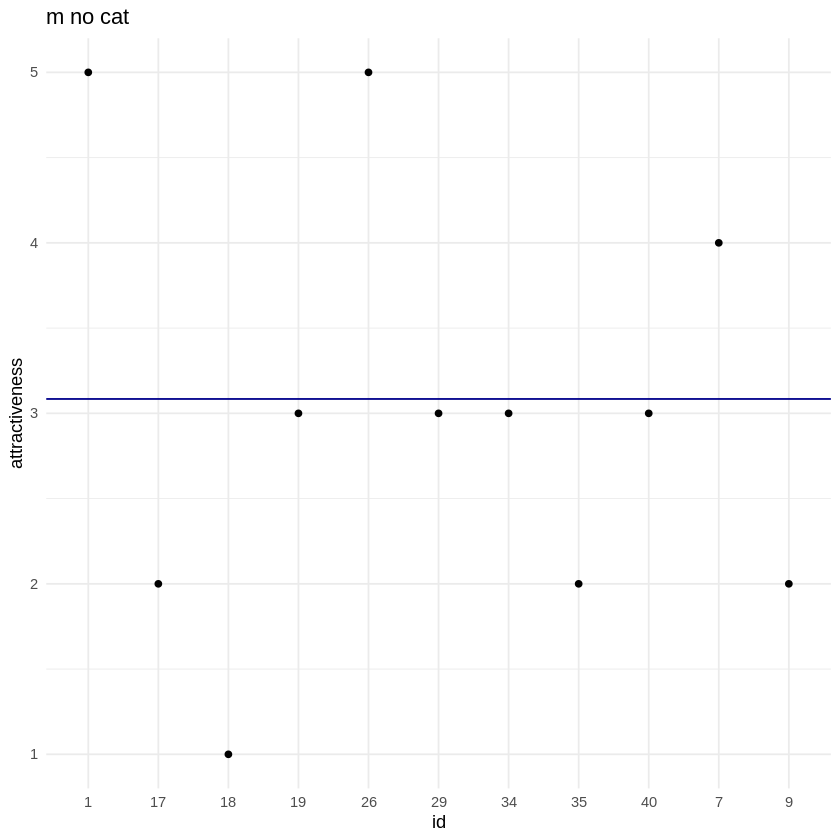

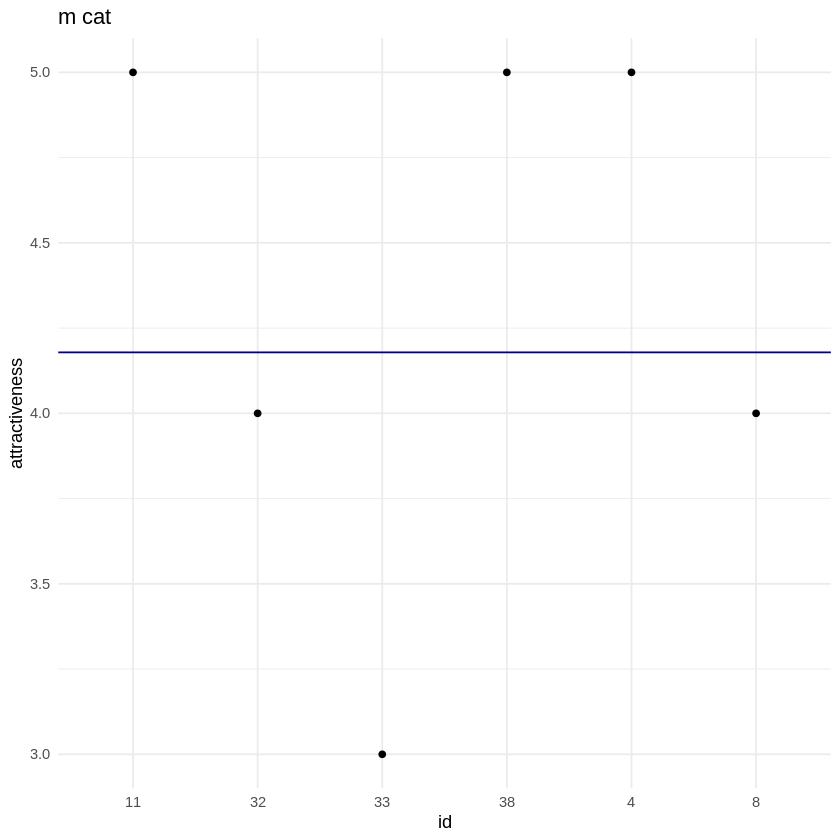

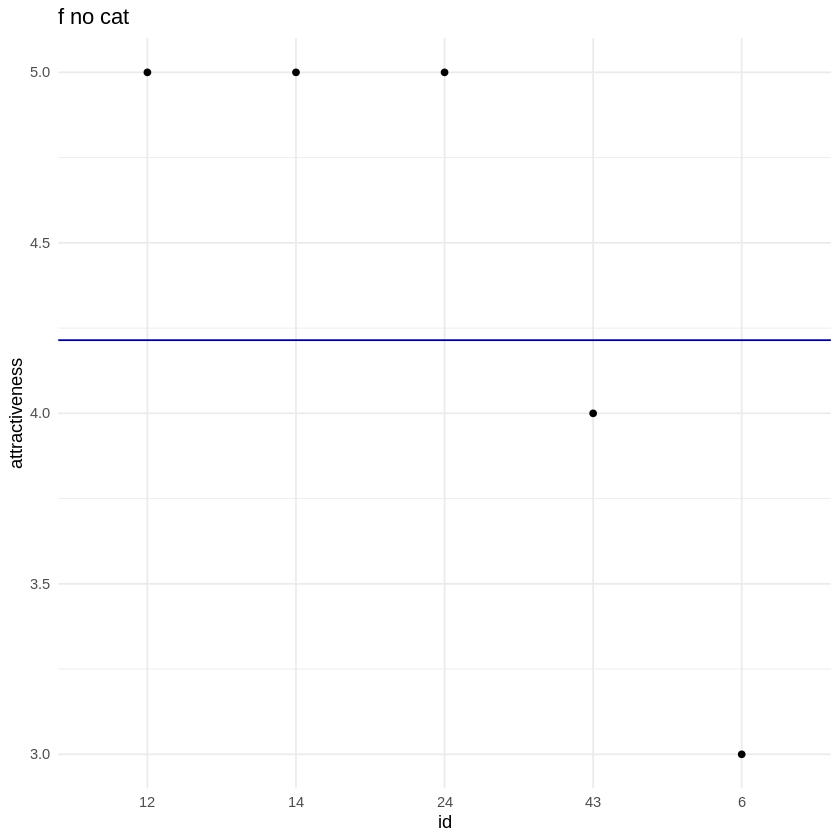

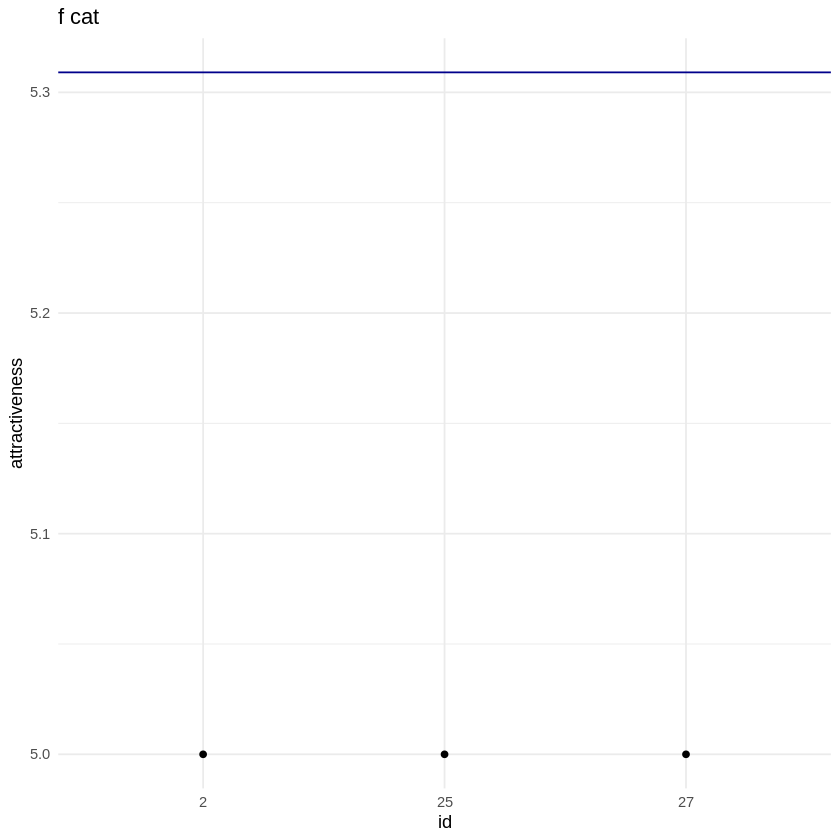

In [49]:
lm_true <- lm(attractiveness ~ profile_gender+profile_cat, data = cat_true)
summary(lm_true)
#effect of male = -1.13 oof
#effect of no_cat = -1.09

#predict attractiveness for each group using model
m0 <- data.frame(profile_gender = "m", profile_cat = "no cat")
m1 <- data.frame(profile_gender = "m", profile_cat = "cat")
f0 <- data.frame(profile_gender = "f", profile_cat = "no cat")
f1 <- data.frame(profile_gender = "f", profile_cat = "cat")

# Predict the attractiveness score
predicted_attractiveness_m0 <- predict(lm_true, newdata = m0)
predicted_attractiveness_m1 <- predict(lm_true, newdata = m1)
predicted_attractiveness_f0 <- predict(lm_true, newdata = f0)
predicted_attractiveness_f1 <- predict(lm_true, newdata = f1)

#plot observed attractiveness for each group with a line indicating predicted attractiveness
#m no cat
cat_true_m0 <- subset(cat_true, group == "m no cat")
ggplot(cat_true_m0, aes(x = id, y = attractiveness)) +
  geom_point() +
  geom_hline(yintercept = predicted_attractiveness_m0, color = "dark blue") +
  labs(title = "m no cat") +
  theme_minimal()
#m cat
cat_true_m1 <- subset(cat_true, group == "m cat")
ggplot(cat_true_m1, aes(x = id, y = attractiveness)) +
  geom_point() +
  geom_hline(yintercept = predicted_attractiveness_m1, color = "dark blue") +
  labs(title = "m cat") +
  theme_minimal()
#f no cat
cat_true_f0 <- subset(cat_true, group == "f no cat")
ggplot(cat_true_f0, aes(x = id, y = attractiveness)) +
  geom_point() +
  geom_hline(yintercept = predicted_attractiveness_f0, color = "dark blue") +
  labs(title = "f no cat") +
  theme_minimal()
#f cat
cat_true_f1 <- subset(cat_true, group == "f cat")
ggplot(cat_true_f1, aes(x = id, y = attractiveness)) +
  geom_point() +
  geom_hline(yintercept = predicted_attractiveness_f1, color = "dark blue") +
  labs(title = "f cat") +
  theme_minimal()

#### Bootstrapping

In [ ]:
#predict cat or no cat from attractiveness and gender

#Gender_dic: no cat = 0, f = 1
cat_true <- cat_true %>%
  mutate(cat_binary = case_when(profile_cat=="no cat"~0, profile_cat=="cat"~1))

glm.fit <- glm(cat_binary~attractiveness+profile_gender, data=cat_true, family=binomial)
summary(glm.fit)
#attractiveness is a significant predictor of profile_cat but gender is not
#^^good and expected since participants were randomly assigned
#to cat or no cat condition

In [44]:
predicted_probs <- predict(glm.fit, cat_true, type = "response", threshold = 0.5)

predicted_probs_binary <- if_else(predicted_probs>0.5, 1, 0)

confusion_df <- data.frame(predicted = predicted_probs_binary,actual = cat_true$cat_binary)
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))
#68% accuracy from model

         actual
predicted  0  1
        0 14  6
        1  2  3

[1] "---"
[1] "Accuracy: 0.68"



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = cat_true, statistic = boot.fn, R = 25)


Bootstrap Statistics :
    original  bias    std. error
t1*     0.68 -0.1088  0.07790593


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"

[1] 0.07790593

Warning message in norm.inter(t, (1 + c(conf, -conf))/2):
“extreme order statistics used as endpoints”


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 25 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_obj, conf = 0.95, type = "basic")

Intervals : 
Level      Basic         
95%   ( 0.60,  0.96 )  
Calculations and Intervals on Original Scale
Some basic intervals may be unstable

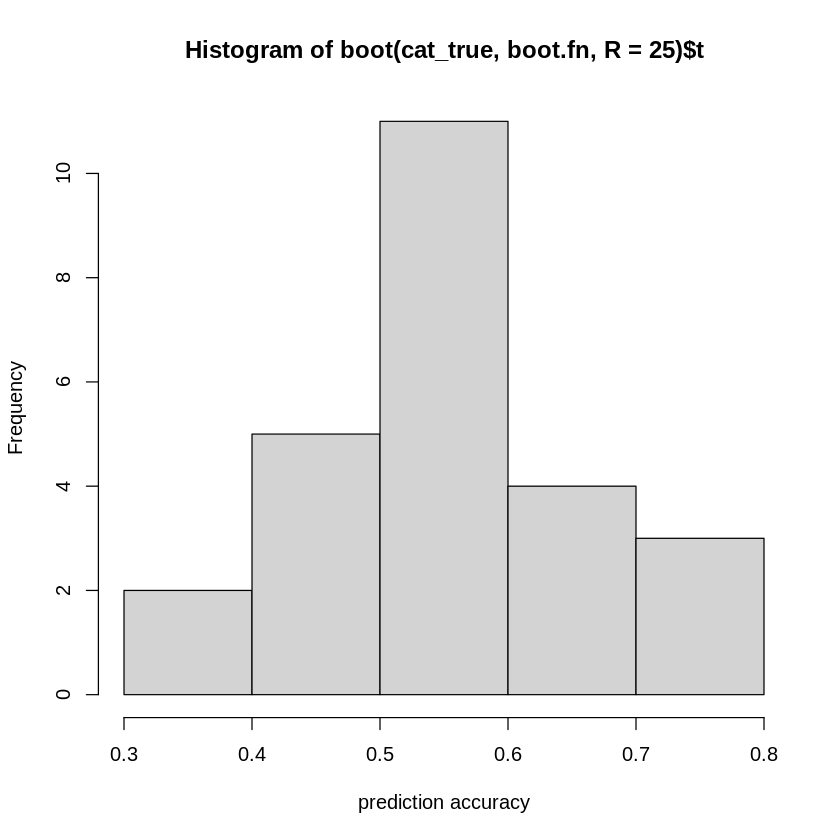

In [50]:
#nrow(cat_true)
set.seed(1)
boot.fn <- function(data,index){
    d <- data[index,]
    #does this include attractiveness + gender?
    glm.fit <- glm(cat_binary~attractiveness+profile_gender, data=cat_true, family=binomial)
    predicted_probs <- predict(glm.fit, d, type = "response", threshold = 0.5)
    predicted_probs_binary <- if_else(predicted_probs>0.5, 1, 0)
    confusion_df <- data.frame(predicted = predicted_probs_binary,actual = cat_true$cat_binary)
    accuracy <- mean(confusion_df$predicted == confusion_df$actual)
    return(accuracy)}

boot_obj = boot(cat_true,boot.fn,R=25)
print(boot_obj)
attributes(boot_obj)
hist(boot(cat_true,boot.fn,R=25)$t, xlab="prediction accuracy")

sd_boot <- sd(boot_obj$t)
sd_boot
ci_boot <- boot.ci(boot_obj, conf = 0.95, type = "basic")
ci_boot
#95% CI: (0.60,  0.96)
#not great, better than chance i guess

##### Permutation Test

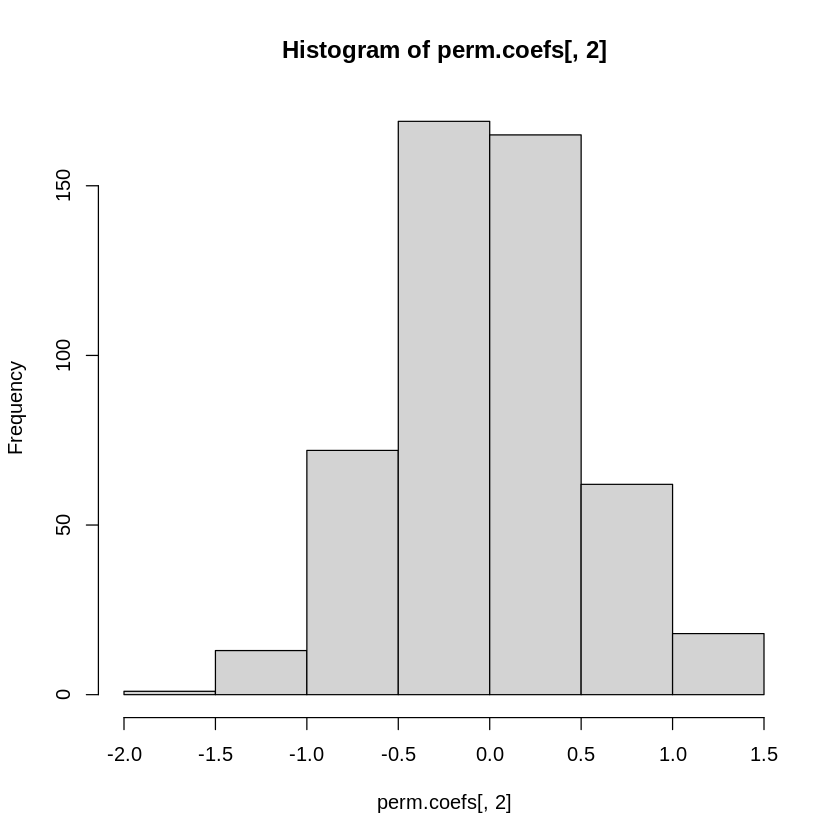

In [68]:
#see probability of observed results in null distribution
#^^aka if coefficient beta estimates for attractiveness and profile_cat = 0

#make copy to preserve non-permuted, true form of data
set.seed(1)
perm_cat_true= cat_true

#set number of iterations
R=500

#make an output object to store the results
perm.coefs=matrix(NA,nrow=R, ncol=2) #filling with nas at first

#for loop to scramble observations in R different ways
for (i in 1:R){
  perm_cat_true$attractiveness=cat_true$attractiveness[sample(25)] # This is a shuffled version of the Auto$horsepower vector
  perm.coefs[i,]=coef(lm(attractiveness~profile_cat, data=perm_cat_true)) # then we get coefficients for linear model of shuffled horsepower to auto
}

#look at the null distributions
hist(perm.coefs[,2])

In [69]:
#re-estimate the real (unpermuted) effect
perm.real = coef(lm(attractiveness~profile_cat, data=cat_true))
perm.real
#Intercept: 4.56    profile_cat=no cat: -1.12
#our observed effect is at lower end of range of coefficient estimates in derived null distribution
#aka our observed effect is still in the derived null distribution

(Intercept) profile_catno cat 
         4.555556         -1.118056

In [71]:
#probability of observing a stronger negative effect than our observed effect due to chance
perm.p = sum(perm.coefs[,2]<perm.real[2])/R
perm.p
#probability: 2.4%
#cannot reject the null hypothesis that the coefficient beta estimates for attractiveness and profile_cat = 0

[1] 0.024

#### LOOCV

In [72]:
#since i don't have many data points, loocv
#uses boot library
glm.fit <- glm(cat_binary~attractiveness+profile_gender, data=cat_true, family=binomial)
coef(glm.fit)

#run LOOCV by setting k to the number of observations
cv.err  = cv.glm(cat_true, glm.fit, K=nrow(cat_true))
cv.err$delta
#cross validated MSE = 0.24

(Intercept)  attractiveness profile_genderm 
      -6.407319        1.246768        1.140243

[1] 0.2366638 0.2354869

### Conclusions

We conclude that profile_gender and profile_cat are significant predictors of attractiveness, with profile being male, and/or containing no cat having a negative impact on attractiveness.

Furthermore, we predicted presence of a cat from attractiveness with a linear model with 68% accuracy. Bootstrapping yielded a 95% prediction accuracy confidence interval of (0.60, 0.96), which is above chance but still not great. Permutation testing showed us that there was a small but non-zero chance (2.4%) that our results could be observed even with no effect of cat on attractiveness.

The cross-validated mean squared error was 0.24, which is somewhat large considering that the scale is 0 to 5.

Overall, we conclude that the woman in the female profile was more attractive than the man in the male profile, and presence of a cat increased attractiveness in both the male and female profiles. We recommend those doing field work in this area (aka users of dating apps) to try including a photo with a cat in their dating app profile to examine this effect further.

# References

Kogan, L., & Volsche, S. (2020). Not the cat’s meow? The impact of posing with cats on female
perceptions of male dateability. Animals, 10(6), 1007. https://doi.org/10.3390/ani10061007